In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pyexcel_xlsx
%pylab inline
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25, 'lines.markersize' : 15, 'xtick.labelsize': 20, 'ytick.labelsize': 20 })#,'font.family': 'serif'})
rc('axes', linewidth=3)
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator


# Load Data

In [3]:
data = pd.read_excel(r'/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/PYTHON/Master_Haz_Dmg.xlsx')
df = pd.DataFrame(data)
df = df.set_index(['FIPS'])

# Clean and Split Data

In [4]:
df = df.round(2)
list(df)


['TRACT',
 'Prop_SFHA_',
 'Prop_DG_Ar',
 'Ave_LS_cod',
 'HWM_MaxD_1',
 'DG_MaxDe_1',
 'HurTrack_D',
 'PeakGust_1',
 'MaxSusta_1',
 'Idx_AorD',
 'Idx_D',
 'DMG_Index',
 'Count_']

In [5]:
df.head()

,TRACT,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,HWM_MaxD_1,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,Idx_AorD,Idx_D,DMG_Index,Count_
FIPS,,,,,,,,,,,,,
72001956300,956300,0.02,0.00,2.00,0.0,0.00,0.24,44.26,34.87,0.00,0.00,0.00,2414
72001956400,956400,0.03,0.02,2.00,0.0,2.72,0.27,43.81,33.98,1.73,0.05,1.78,1854
72001956500,956500,0.01,0.00,1.88,0.0,0.00,0.29,43.36,33.98,0.71,0.00,0.71,1833
72001956600,956600,0.05,0.00,1.80,0.0,0.00,0.26,43.81,34.42,0.00,0.00,0.00,698
72001956700,956700,0.10,0.00,2.00,0.0,0.00,0.26,43.81,34.42,0.00,0.00,0.00,790


In [6]:
df.DMG_Index.replace(0, .01, inplace = True)


df.head()


,TRACT,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,HWM_MaxD_1,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,Idx_AorD,Idx_D,DMG_Index,Count_
FIPS,,,,,,,,,,,,,
72001956300,956300,0.02,0.00,2.00,0.0,0.00,0.24,44.26,34.87,0.00,0.00,0.01,2414
72001956400,956400,0.03,0.02,2.00,0.0,2.72,0.27,43.81,33.98,1.73,0.05,1.78,1854
72001956500,956500,0.01,0.00,1.88,0.0,0.00,0.29,43.36,33.98,0.71,0.00,0.71,1833
72001956600,956600,0.05,0.00,1.80,0.0,0.00,0.26,43.81,34.42,0.00,0.00,0.01,698
72001956700,956700,0.10,0.00,2.00,0.0,0.00,0.26,43.81,34.42,0.00,0.00,0.01,790


In [7]:
df = df.drop(['TRACT', 'HWM_MaxD_1', 'Idx_D', 'Idx_AorD'], axis=1).round(2)


df_x = df.drop(['DMG_Index'], axis=1)
df_y = df.DMG_Index

In [109]:
df_x.head()

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,Count_
FIPS,,,,,,,,
72001956300,0.02,0.00,2.00,0.00,0.24,44.26,34.87,2414
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1854
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,1833
72001956600,0.05,0.00,1.80,0.00,0.26,43.81,34.42,698
72001956700,0.10,0.00,2.00,0.00,0.26,43.81,34.42,790


In [110]:
df_y.head()

FIPS
72001956300    0.01
72001956400    1.78
72001956500    0.71
72001956600    0.01
72001956700    0.01
Name: DMG_Index, dtype: float64

In [111]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

In [112]:
#SET RANDOM STATE TO GET REPRODUCIBLE RESULTS, otherwise can randomizeas default is none
rf = RandomForestRegressor(random_state = 42)
print(rf.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)>


# Optimize Hyperparameters

## RandomizedSearchCV to narrow range of hyperparameters

In [113]:


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)



{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [114]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using cv = cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [115]:
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV] n_estimators=1788, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40 
[CV] n_estimators=1788, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40 
[CV] n_estimators=1788, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40 
[CV]  n_estimators=1788, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=40, total=   3.7s
[CV] n_estimators=1788, min_sa

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s


[CV]  n_estimators=522, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, total=   1.7s
[CV] n_estimators=522, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100 
[CV]  n_estimators=522, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, total=   1.7s
[CV] n_estimators=522, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100 
[CV]  n_estimators=522, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, total=   1.7s
[CV] n_estimators=1577, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100 
[CV]  n_estimators=1788, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, total=   5.6s
[CV] n_estimators=1577, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=100 
[CV]  n_estimators=522, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, total=   1.8s
[CV] n_estimators=1577, min_samples

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   56.8s


[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, total=   5.1s
[CV] n_estimators=522, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, total=   5.0s
[CV] n_estimators=522, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, total=   5.1s
[CV] n_estimators=311, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=522, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, total=   1.9s
[CV] n_estimators=311, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=522, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=None, total=   2.0s
[CV] n_estimators=311, min_samples_

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.5min


[CV]  n_estimators=1577, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   4.2s
[CV] n_estimators=733, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100 
[CV]  n_estimators=733, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, total=   2.9s
[CV] n_estimators=733, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100 
[CV]  n_estimators=1577, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   4.3s
[CV] n_estimators=733, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100 
[CV]  n_estimators=1577, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   4.3s
[CV] n_estimators=944, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40 
[CV]  n_estimators=1577, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   4.2s
[CV] n_estimators=944, min_samples_split

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [116]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80}

In [117]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return errors
    return mape
    return accuracy
    

In [118]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)



best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)



Model Performance
Average Error: 2.3478.
Model Performance
Average Error: 2.2726.


In [119]:
best_random.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>

In [120]:
base_model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)>

## GridSearchCV to iterate over the options

In [121]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [122]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8,

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s


[CV]  max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.2s
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300 
[CV]  max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.2s
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, total=   2.2s
[CV] max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300, total=   0.7s
[CV]  max_depth=80, max_features=2, min_samples_leaf=3, min_samples_

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.5s


[CV]  max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.1s
[CV] max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   0.7s
[CV] max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.1s
[CV] max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.1s
[CV] max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000 
[CV]  max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000, total=   2.1s
[CV] max_depth=80, max_features=2, min_samples_leaf=5, min_samples

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   44.7s


[CV]  max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000, total=   2.7s
[CV] max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.2s
[CV] max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   0.8s
[CV] max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.3s
[CV] max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8,

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min


[CV]  max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.3s
[CV] max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.3s
[CV] max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.2s
[CV] max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   0.8s
[CV] max_depth=90, max_features=3, min_samples_leaf=4, min_samples_spl

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.2min


[CV]  max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.3s
[CV] max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   0.3s
[CV] max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.5s
[CV] max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.5s
[CV] max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   0.5s
[CV] max_depth=100, max_features=3, min_samples_leaf=4, min_s

[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [123]:
grid_search.best_params_

{'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [124]:
best_grid = grid_search.best_estimator_

In [125]:
grid_accuracy = evaluate(best_grid, x_train, y_train)

Model Performance
Average Error: 2.2037.


In [126]:
model = best_grid

# Look at Performance More

In [127]:
base_model.score(x_train, y_train)

0.76430821824277095

In [128]:
base_model.score(x_test, y_test)

0.14939949434678834

In [129]:
model.score(x_train, y_train)

0.38957656186795131

In [130]:
model.score(x_test, y_test)

0.23569065645075737

In [131]:
pred = model.predict(x_test)

In [132]:
mse = mean_squared_error(y_test, pred)
mse

9.0372599162474323

In [133]:
errors = pred - y_test
errors
meanerror = np.mean(errors)
meanerror

0.31401095640547211

In [134]:
meanabserrors = np.mean(abs(pred - y_test))
meanabserrors

2.229252391509764

In [135]:
def getrange(numbers):
    return max(numbers) - min(numbers)

print(getrange(errors))
print(max(errors))
print(min(errors))

19.909986773610868
5.993478811115358
-13.916507962495508


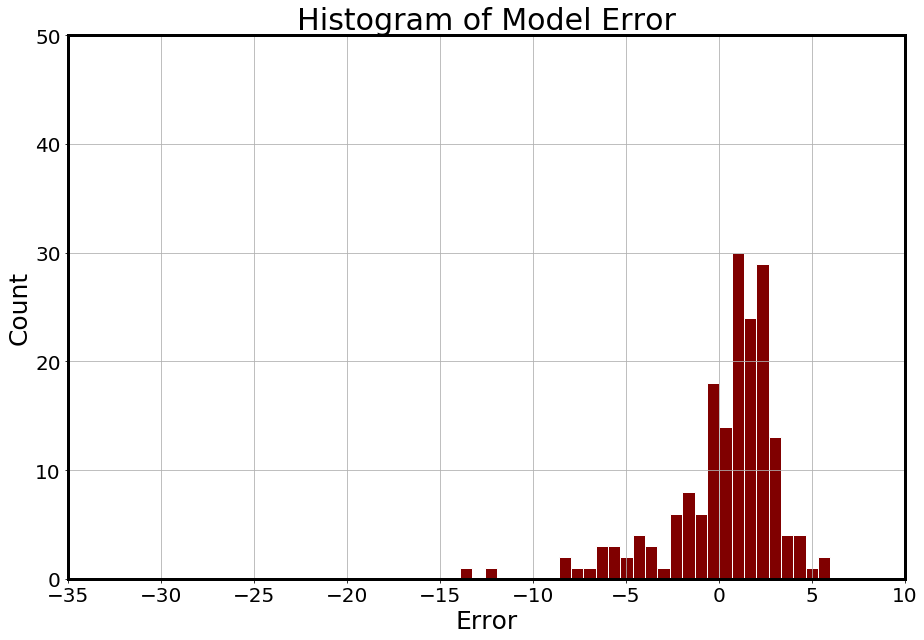

In [136]:
plt.hist(errors, 30, histtype='bar', ec='white', color='maroon')

plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Histogram of Model Error')
plt.grid(True)
xlim(-35,10)
ylim(0,50)

plt.savefig('/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/PYTHON/HIS_M')

# Cheat a bit and arrange things in excel because I am lazy

In [137]:
pred_look = pd.DataFrame(pred)

pred_look.to_excel(excel_writer= "/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/PYTHON/pred_look_20190926_2.xlsx")

In [138]:
true_look = pd.DataFrame(y_test)
true_look.to_excel(excel_writer= "/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/PYTHON/true_look_20190926_2.xlsx")

In [139]:
#reimport

data2 = pd.read_excel(r'/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/PYTHON/DMGIndex_Pred_20190926_2.xlsx')
df2 = pd.DataFrame(data2)
df2 = df2.set_index('FIPS')
df2

true = df2['DMG_Index']
prediction = df2['Pred']
prediction

FIPS
72013302100    4.109471
72081958400    3.250967
72031050110    2.044051
72031051002    2.387756
72009250300    3.442988
72145560300    6.533964
72091570400    2.741565
72021031113    3.160437
72013302202    4.373348
72019952400    2.895693
72127005300    2.067690
72079850300    1.544529
72025201200    2.725762
72073956100    3.327876
72057270202    5.158178
72075710500    2.015318
72145560204    5.777242
72113072400    2.985224
72091570800    5.364561
72013301800    4.983492
72031050105    2.552932
72133953800    2.917781
72113072500    2.817722
72127006200    1.269679
72107954801    2.677197
72127006900    1.911549
72005401402    2.861828
72053150200    3.317977
72043954600    2.613701
72107954902    4.459242
                 ...   
72007230100    5.089549
72137120800    2.809794
72069180400    4.183515
72131959200    3.428152
72141956900    5.497565
72021031101    2.691033
72015280202    6.055453
72091570100    5.968663
72119130401    3.927727
72019952201    2.970885
72069180500

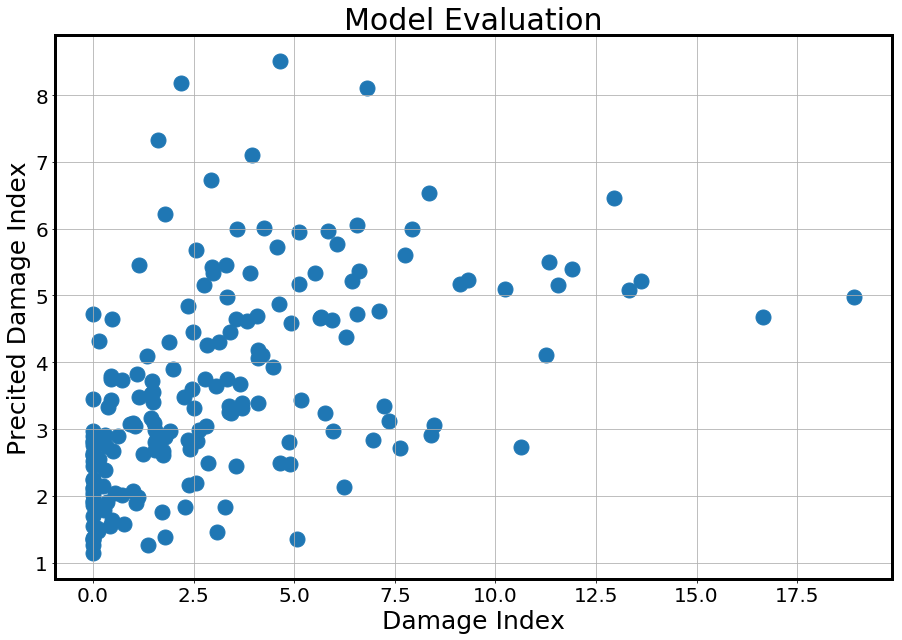

In [140]:
plt.figure()
plt.scatter(df2.DMG_Index, df2.Pred)
plt.xlabel("Damage Index")
plt.ylabel("Precited Damage Index")
plt.title('Model Evaluation')
plt.grid(True)



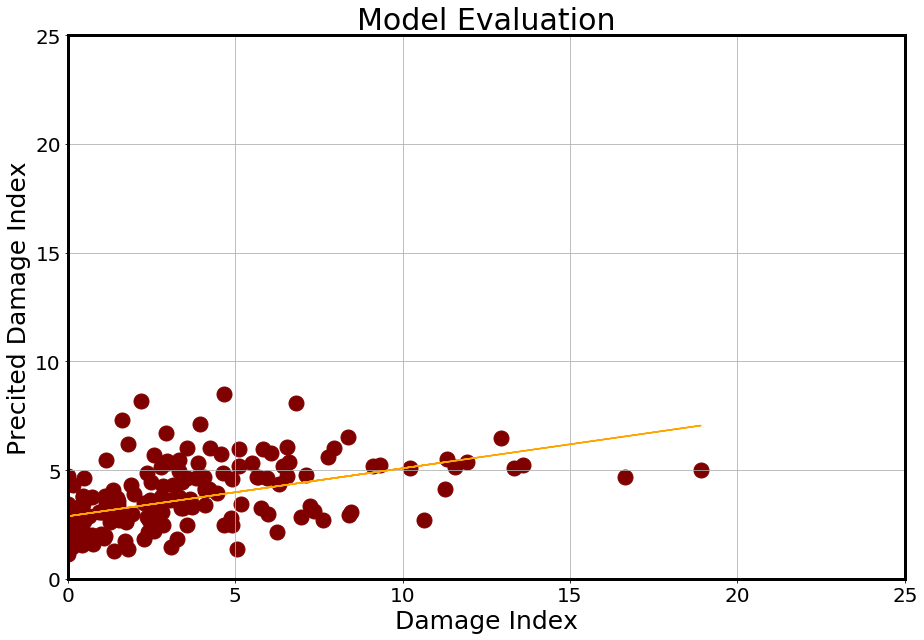

In [148]:
from sklearn.linear_model import LinearRegression

X = df2.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df2.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column


linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y, color='maroon')
plt.plot(X, Y_pred, color='orange')
plt.grid(True)
plt.xlabel("Damage Index")
plt.ylabel("Precited Damage Index")
plt.title('Model Evaluation')
plt.xlim(0,25)
plt.ylim(0,25)

#plt.savefig('/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/PYTHON/ME_M')

plt.show()



In [142]:
from sklearn.metrics import r2_score
r2_score(X, Y) 

0.23569065645075737

# Feature Importances

In [143]:
importances = model.feature_importances_
importance_d = pd.DataFrame(importances, index = x_train.columns, columns=['importance']).sort_values('importance', ascending=False)

std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.270084)
2. feature 4 (0.159586)
3. feature 6 (0.155857)
4. feature 5 (0.146011)
5. feature 0 (0.109930)
6. feature 2 (0.070002)
7. feature 3 (0.060974)
8. feature 1 (0.027555)


In [144]:
importance_d

,importance
Count_,0.270084
HurTrack_D,0.159586
MaxSusta_1,0.155857
PeakGust_1,0.146011
Prop_SFHA_,0.109930
Ave_LS_cod,0.070002
DG_MaxDe_1,0.060974
Prop_DG_Ar,0.027555


In [145]:
label = ['Count', 'MaxSusta', 'HurTrack_D', 'PeakGust', 'Prop_SFHA', 'Ave_LS_Cod', 'DG_MaxDe', 'Prop_DG_Ar']

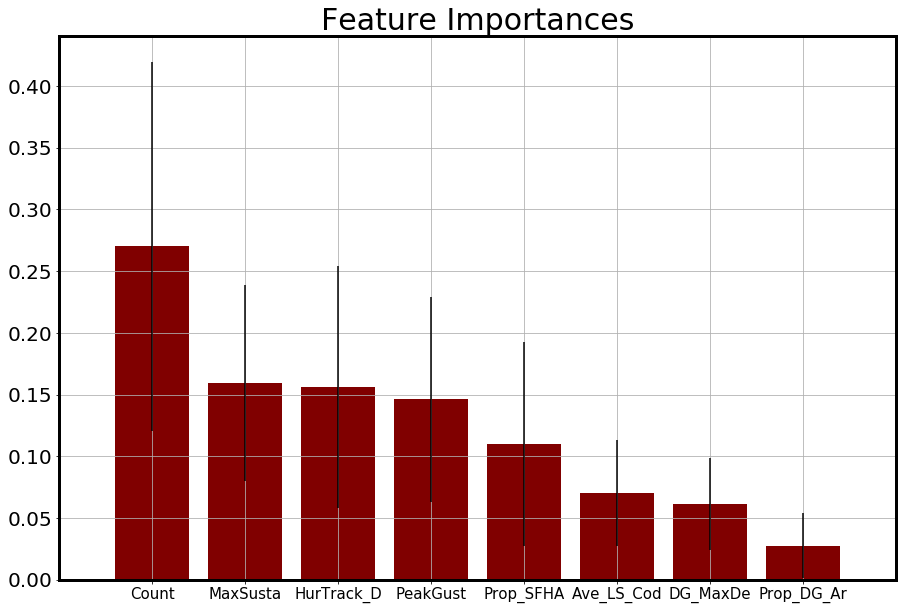

In [146]:
plt.figure()
plt.title("Feature Importances", fontsize = 30)
plt.bar(range(x_train.shape[1]), importances[indices],
       yerr=std[indices], align="center", color='maroon')
plt.xticks(range(x_train.shape[1]), label, fontsize = 15)
#plt.xlabel(importance_d.index)
plt.xlim([-1, x_train.shape[1]])
plt.grid(True)

#plt.savefig('/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/PYTHON/FI_M')



# Visualize a tree

In [282]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

feature_list = list(df_x.columns)


# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
#Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [287]:
x_train

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,Count_
FIPS,,,,,,,,
72117959600,0.00,0.00,1.00,0.00,0.36,35.76,28.16,3404
72113070503,0.33,0.00,1.00,2.49,0.35,42.92,33.53,1145
72039955800,0.04,0.02,1.50,9.10,0.05,51.86,40.68,2633
72133953600,0.21,0.01,0.82,9.51,0.28,46.49,36.21,2795
72071410600,0.00,0.00,1.09,7.86,0.15,42.02,33.08,2933
72021032302,0.00,0.00,1.75,4.51,0.12,57.67,45.15,1160
72057270400,0.16,0.00,1.00,0.00,0.13,53.20,41.57,1392
72031050242,0.12,0.00,1.00,0.00,0.29,59.90,46.94,1816
72017590200,0.72,0.30,0.67,6.45,0.07,51.86,41.57,1764
